# **Reto 1: Coeficiente de correlación de Pearson**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
ruta_1 = '/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv'
ruta_2 = '/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto athlete_olympic_events-clean-no_repetition.csv'
ruta_3 =  '/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto videogame_sales-raw.csv'

a) Ruta 1: Near Earth Objects

In [3]:
df1 = pd.read_csv(ruta_1, index_col=0)
df1.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


<Axes: xlabel='estimated_diameter.meters.estimated_diameter_min', ylabel='estimated_diameter.meters.estimated_diameter_max'>

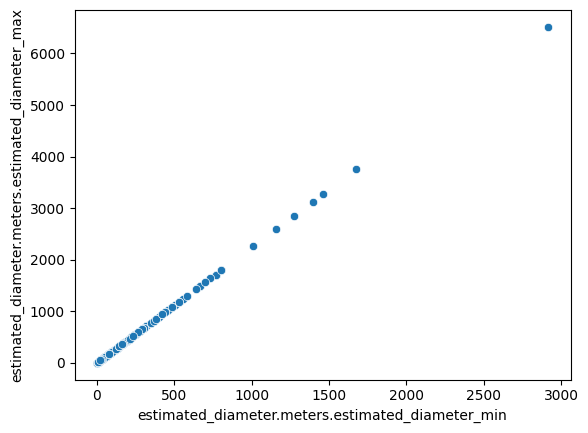

In [4]:
sns.scatterplot(x=df1['estimated_diameter.meters.estimated_diameter_min'], y=df1['estimated_diameter.meters.estimated_diameter_max'])

In [5]:
print('Correlacion entre diametro estimado:', df1['estimated_diameter.meters.estimated_diameter_min'].corr(df1['estimated_diameter.meters.estimated_diameter_max']))

Correlacion entre diametro estimado: 1.0


<Axes: xlabel='estimated_diameter.meters.estimated_diameter_max', ylabel='relative_velocity.kilometers_per_second'>

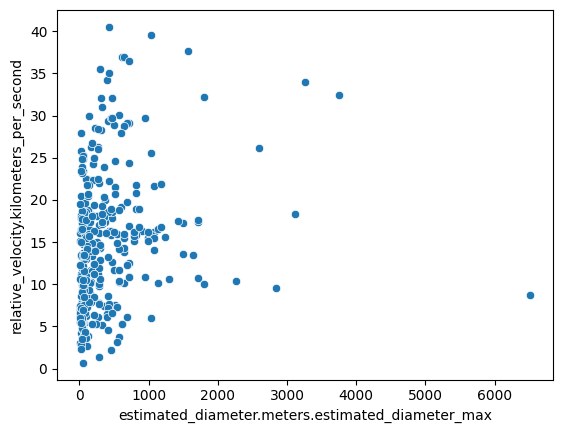

In [6]:
sns.scatterplot(x=df1['estimated_diameter.meters.estimated_diameter_max'], y=df1['relative_velocity.kilometers_per_second'])

In [7]:
print('Correlacion entre diametro y velocidad: ', df1['estimated_diameter.meters.estimated_diameter_max'].corr(df1['relative_velocity.kilometers_per_second']))

Correlacion entre diametro y velocidad:  0.2101091968360082


b) Ruta 2: Athlete Olympic Events

In [8]:
df2 = pd.read_csv(ruta_2, index_col=0)
df2.head()

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M


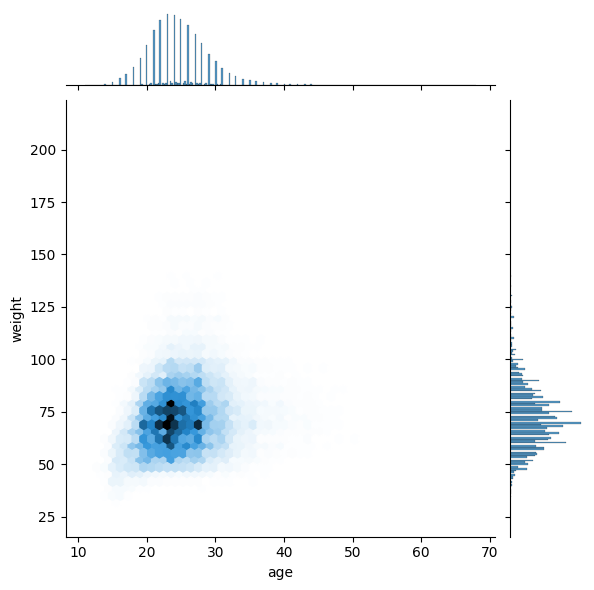

In [9]:
sns.jointplot(x=df2['age'], y=df2['weight'], kind='hex')

In [10]:
print('Correlacion entre la edad y el peso: ', df2['age'].corr(df2['weight']))

Correlacion entre la edad y el peso:  0.1920715724430633


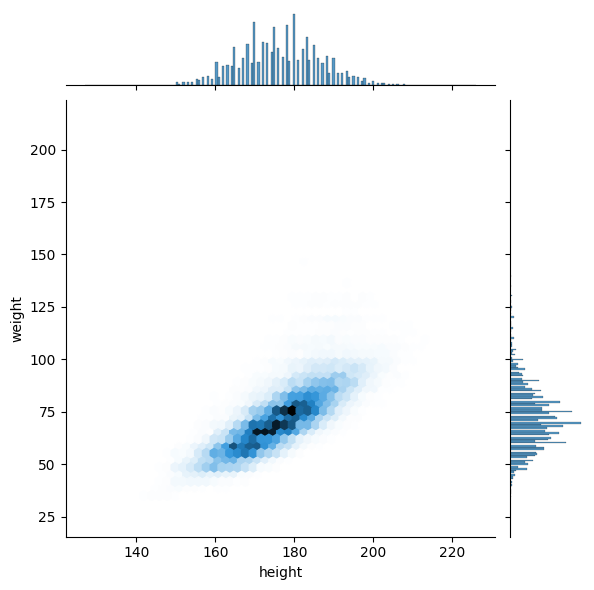

In [11]:
sns.jointplot(x=df2['height'], y=df2['weight'], kind='hex')

In [12]:
print('Correlacion entre peso y altura: ', df2['height'].corr(df2['weight']))

Correlacion entre peso y altura:  0.7756933060520288


c) Ruta 3: Ventas de videojuegos a través del mundo.

In [13]:
df3 = pd.read_csv(ruta_3)
df3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
df3 = df3[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


In [15]:
df3 = df3[df3>0]
df3 = df3[df3['NA_Sales']<20]
df3 = df3[df3['JP_Sales']<10]

<Axes: xlabel='NA_Sales', ylabel='JP_Sales'>

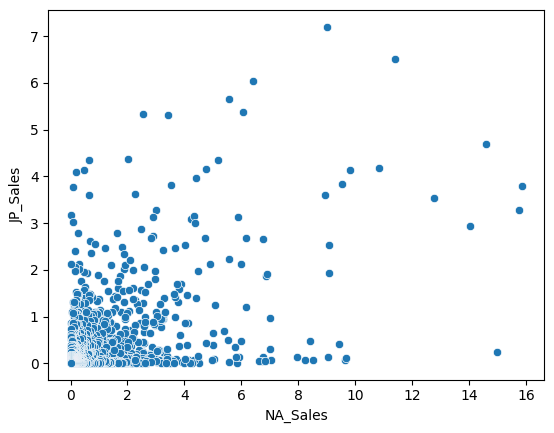

In [16]:
sns.scatterplot(x=df3['NA_Sales'], y=df3['JP_Sales'])

In [17]:
print('Correlacion entre NA y JP: ', df3['NA_Sales'].corr(df3['JP_Sales']))

Correlacion entre NA y JP:  0.4821980002189013


<Axes: xlabel='Other_Sales', ylabel='Global_Sales'>

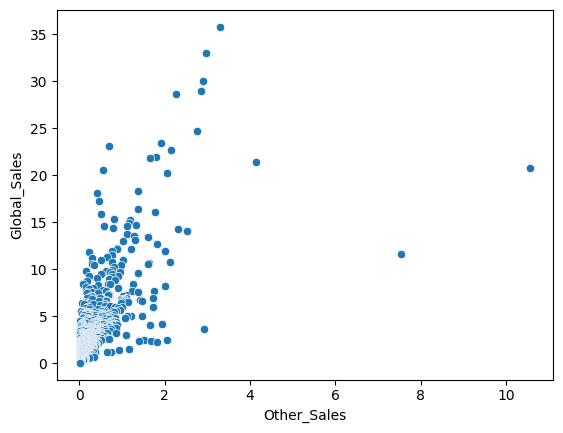

In [18]:
sns.scatterplot(x=df3['Other_Sales'], y=df3['Global_Sales'])

In [19]:
print('Correlacion entre other y global: ', df3['Other_Sales'].corr(df3['Global_Sales']))

Correlacion entre other y global:  0.7095178537517361


<Axes: xlabel='NA_Sales', ylabel='Global_Sales'>

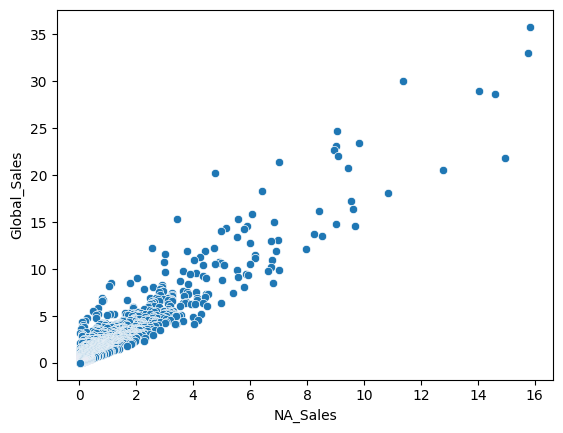

In [20]:
sns.scatterplot(x=df3['NA_Sales'], y=df3['Global_Sales'])

In [21]:
print('Correlacion entre NA y global: ', df3['NA_Sales'].corr(df3['Global_Sales']))

Correlacion entre NA y global:  0.9415973233341933


# **Reto 2: Matriz de correlaciones**

In [22]:
df2 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto wine_quality_red-clean.csv', index_col=0)
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df2_filt = df2.corr()
df2_filt

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


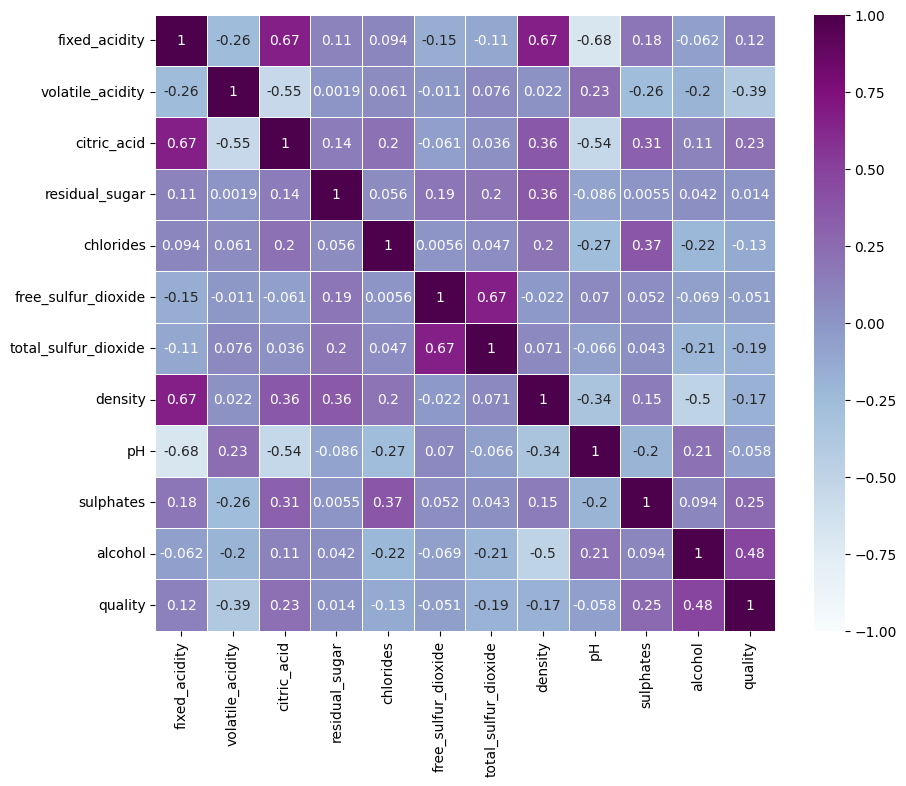

In [24]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df2_filt, vmin=-1, vmax=1, annot=True, cmap='BuPu', linewidths=0.5)

# **Reto 3: Gráficas de Dispersión**

In [25]:
df3 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto wine_quality_red-clean.csv', index_col=0)
df3.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df3_corr = df3.corr()
df3_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


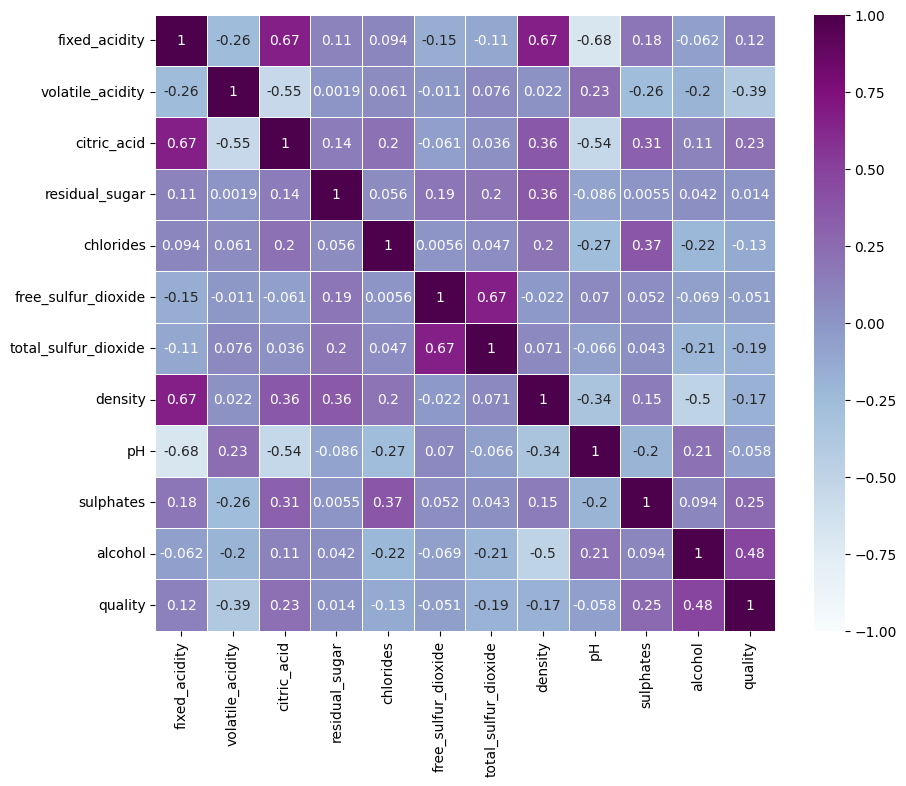

In [27]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df3_corr, vmin=-1, vmax=1, annot=True, cmap='BuPu', linewidths=0.5)

<Axes: xlabel='fixed_acidity', ylabel='citric_acid'>

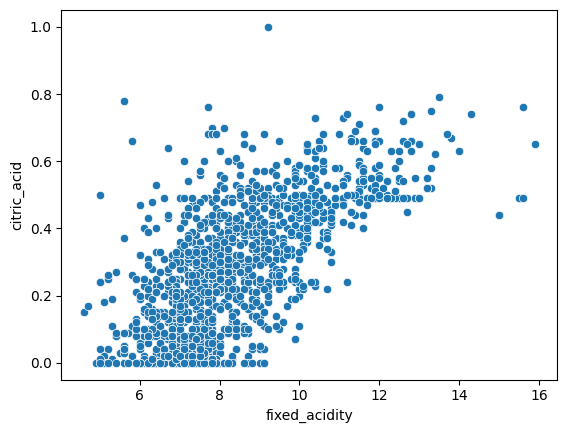

In [28]:
sns.scatterplot(x=df3['fixed_acidity'], y=df3['citric_acid'])

In [29]:
df3['fixed_acidity'].corr(df3['citric_acid'])

0.671703434764106

In [30]:
df3_no_zeros = df3[df3['citric_acid']>0]

<Axes: xlabel='fixed_acidity', ylabel='citric_acid'>

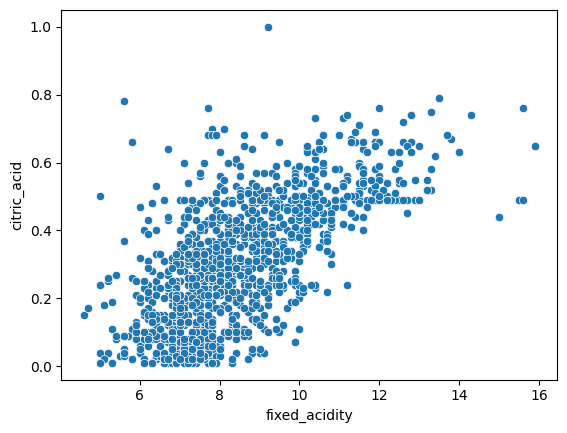

In [31]:
sns.scatterplot(x=df3_no_zeros['fixed_acidity'], y=df3_no_zeros['citric_acid'])

In [32]:
df3_no_zeros['fixed_acidity'].corr(df3_no_zeros['citric_acid'])

0.6595435089028382

<Axes: xlabel='density', ylabel='fixed_acidity'>

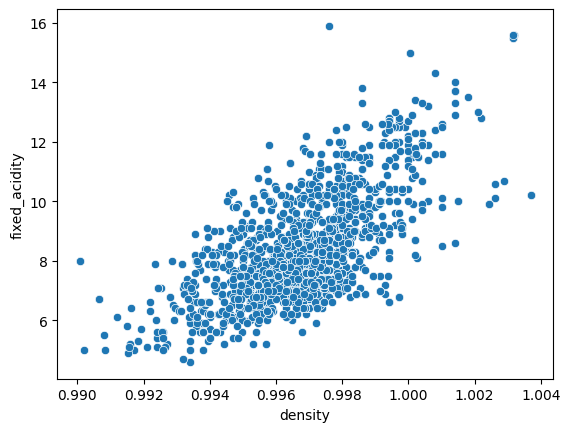

In [33]:
sns.scatterplot(x=df3['density'], y=df3['fixed_acidity'])

In [34]:
df3['density'].corr(df3['fixed_acidity'])

0.6680472921189737

<Axes: xlabel='alcohol', ylabel='quality'>

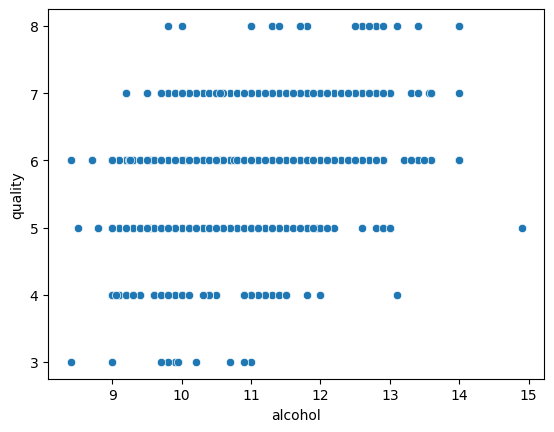

In [35]:
sns.scatterplot(x=df3['alcohol'], y=df3['quality'])

In [36]:
df3['alcohol'].corr(df3['quality'])

0.47616632400113584

<Axes: xlabel='total_sulfur_dioxide', ylabel='citric_acid'>

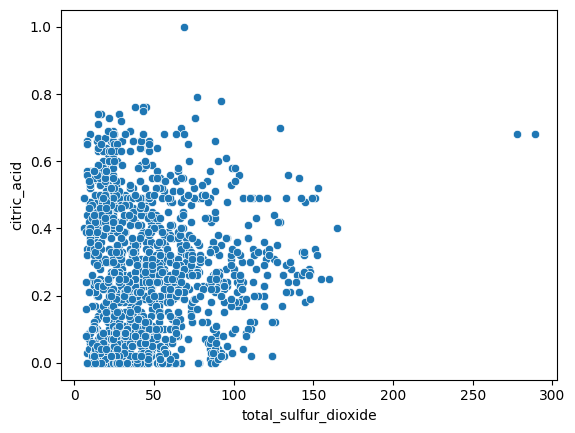

In [37]:
sns.scatterplot(x=df3['total_sulfur_dioxide'],y=df3['citric_acid'])

In [38]:
df3['total_sulfur_dioxide'].corr(df3['citric_acid'])

0.03553302393116144

<Axes: xlabel='total_sulfur_dioxide', ylabel='citric_acid'>

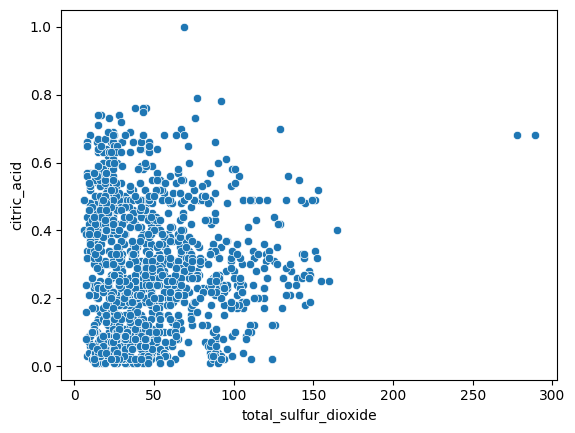

In [39]:
df3_no_zeros = df3[df3['citric_acid']>0]
sns.scatterplot(x=df3_no_zeros['total_sulfur_dioxide'],y=df3_no_zeros['citric_acid'])

In [40]:
df3_no_zeros['total_sulfur_dioxide'].corr(df3_no_zeros['citric_acid'])

-0.021967734179765584

# **Reto 4: Regresión Lineal Simple**

In [41]:
df4 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto wine_quality_red-clean.csv', index_col=0)
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df4.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


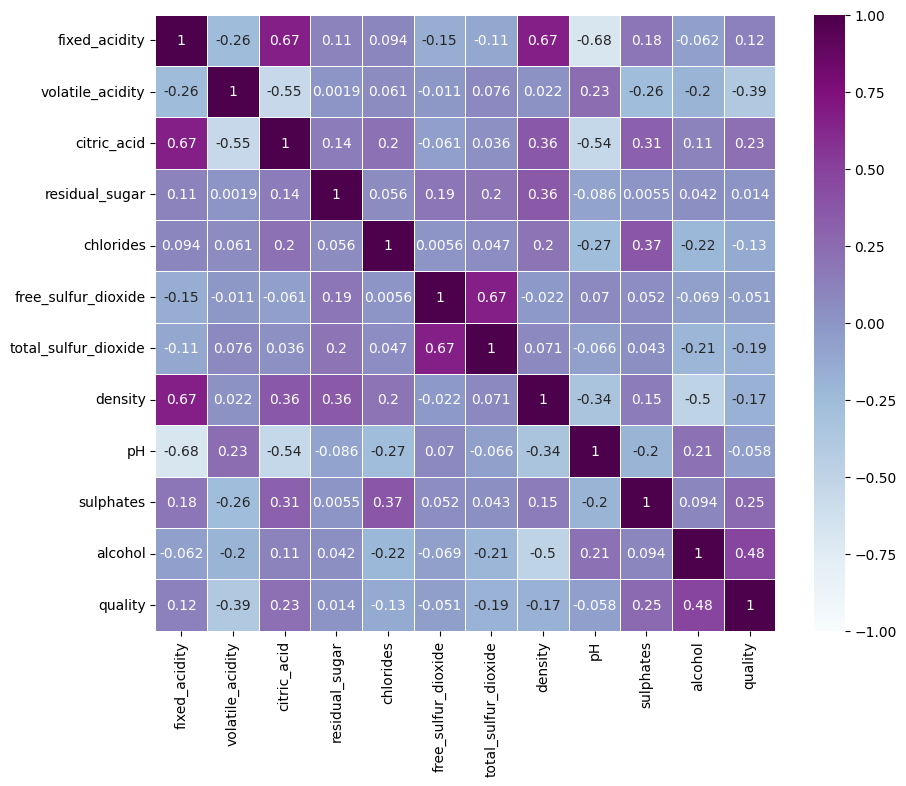

In [43]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu', linewidths=0.5)

In [44]:
sns.pairplot(df4)

Output hidden; open in https://colab.research.google.com to view.

In [45]:
#3 relaciones de variables

<Axes: xlabel='total_sulfur_dioxide', ylabel='free_sulfur_dioxide'>

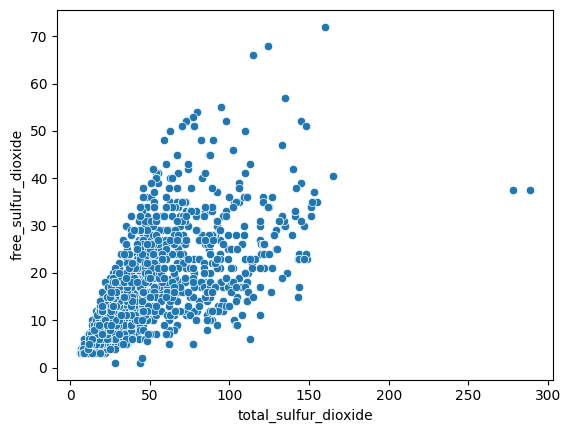

In [46]:
#Total_sulfure_dioxide  free_sulfur_dixide
sns.scatterplot(x=df4['total_sulfur_dioxide'], y=df4['free_sulfur_dioxide'])

In [47]:
df4['total_sulfur_dioxide'].corr(df4['free_sulfur_dioxide'])

0.6676664504810217

In [48]:
df4 = df4[df4['total_sulfur_dioxide']<250]
df4 = df4[df4['free_sulfur_dioxide']<65]
df4['total_sulfur_dioxide'].corr(df4['free_sulfur_dioxide'])

0.6667488931181907

<Axes: xlabel='total_sulfur_dioxide', ylabel='free_sulfur_dioxide'>

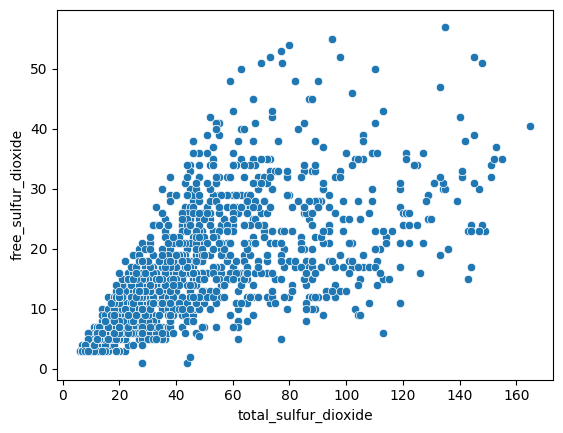

In [49]:
sns.scatterplot(x=df4['total_sulfur_dioxide'], y=df4['free_sulfur_dioxide'])

In [50]:
df4 = df4.dropna()

In [51]:
df4['total_sulfur_dioxide'].corr(df4['free_sulfur_dioxide'])

0.6667488931181907

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(df4['total_sulfur_dioxide'].to_frame(), df4['free_sulfur_dioxide'])

LinearRegression()

In [54]:
y_predict = lr.predict(df4['total_sulfur_dioxide'].to_frame())

<Axes: xlabel='total_sulfur_dioxide', ylabel='free_sulfur_dioxide'>

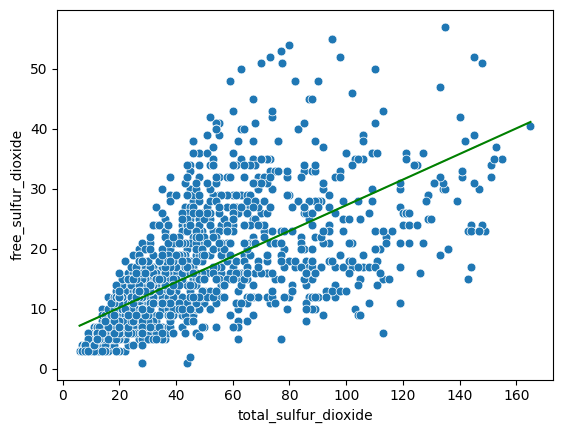

In [55]:
sns.scatterplot(x=df4['total_sulfur_dioxide'], y=df4['free_sulfur_dioxide'], s=40)
#sns.scatterplot(x=df4['total_sulfur_dioxide'], y=y_predict)
sns.lineplot(x=df4['total_sulfur_dioxide'], y=y_predict, color='g')

In [56]:
lr.score(df4['total_sulfur_dioxide'].to_frame(), df4['free_sulfur_dioxide'])

0.4445540864743325

In [57]:
#density  fixed_acidity

<Axes: xlabel='density', ylabel='fixed_acidity'>

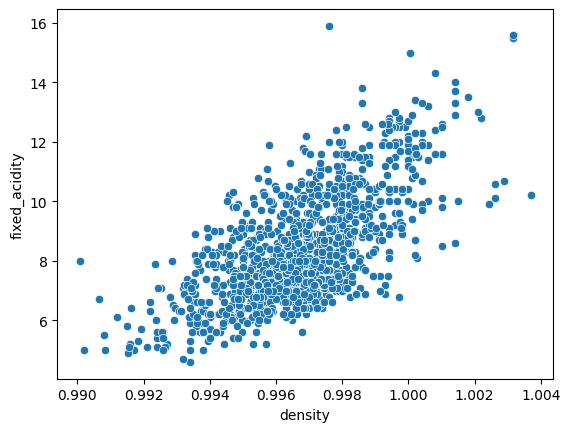

In [58]:
sns.scatterplot(x=df4['density'], y=df4['fixed_acidity'])

In [59]:
df4['density'].corr(df4['fixed_acidity'])

0.6731566781165613

In [60]:
Ffit_2 = lr.fit(df4['density'].to_frame(), df4['fixed_acidity'])

In [61]:
y2_predict = lr.predict(df4['density'].to_frame())

<Axes: xlabel='density', ylabel='fixed_acidity'>

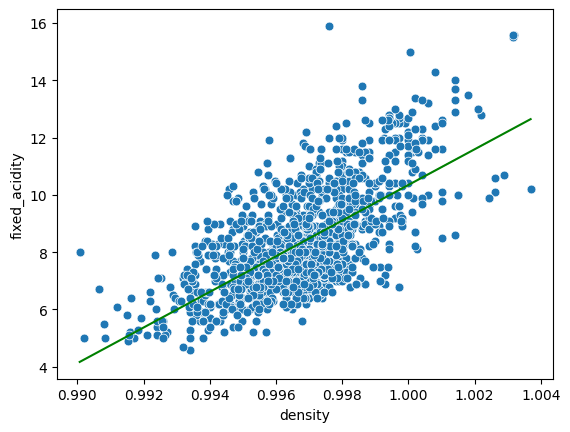

In [62]:
sns.scatterplot(x=df4['density'], y=df4['fixed_acidity'], s=40)
sns.lineplot(x=df4['density'], y=y2_predict, c='g')

In [63]:
lr.score(df4['density'].to_frame(), df4['fixed_acidity'])

0.4531399132929229

In [ ]:
#fixed_acidity  citric_acid

<Axes: xlabel='fixed_acidity', ylabel='citric_acid'>

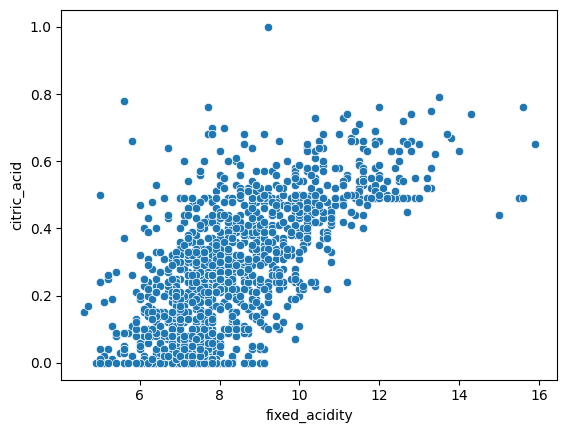

In [64]:
sns.scatterplot(x=df4['fixed_acidity'], y=df4['citric_acid'])

In [65]:
df4['fixed_acidity'].corr(df4['citric_acid'])

0.6743805952536276

In [72]:
df4['citric_acid']>
df4['fixed_acidity'].corr(df4['citric_acid'])

0.6743805952536276

<Axes: xlabel='fixed_acidity', ylabel='citric_acid'>

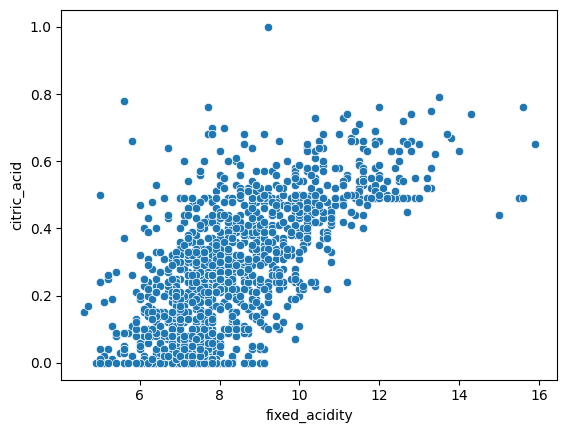

In [73]:
sns.scatterplot(x=df4['fixed_acidity'], y=df4['citric_acid'])

In [74]:
lr.fit(df4['fixed_acidity'].to_frame(), df4['citric_acid'])

LinearRegression()

In [76]:
y3_predict = lr.predict(df4['fixed_acidity'].to_frame())

<Axes: xlabel='fixed_acidity', ylabel='citric_acid'>

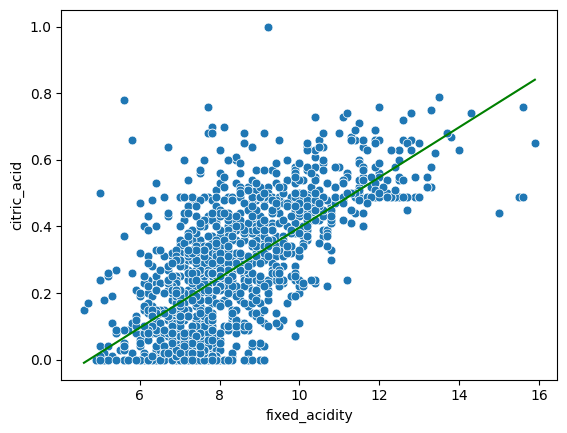

In [77]:
sns.scatterplot(x=df4['fixed_acidity'], y=df4['citric_acid'], s=40)
sns.lineplot(x=df4['fixed_acidity'], y=y3_predict, c='g')

In [78]:
lr.score(df4['fixed_acidity'].to_frame(), df4['citric_acid'])

0.45478918725463735